In [1]:
import sys
ga_path = '/Users/pdcos/Documents/Estudos/Mestrado/Tese/Algoritmos Evolutivos/evolutionary_algorithms/src'
sys.path.append(ga_path)
from models.pso import PSO
from models.differential_evolution import DifferentialEvolutionAlgorithm
from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
rocket_fitness = RocketFitness(bound_values)
random_values = np.random.rand(10,10)
fitness_func_class = rocket_fitness.calc_fitness


  0%|          | 1/200 [00:01<06:10,  1.86s/it]

Epoch 0: Best: 0.11702371508153757, Average: 0.0005851185754076879


  6%|▌         | 11/200 [00:25<07:27,  2.37s/it]

Epoch 10: Best: 0.18033249896817855, Average: 0.0865061855515556


 10%|█         | 21/200 [00:57<10:52,  3.65s/it]

Epoch 20: Best: 0.18033262306184, Average: 0.08655965441052124


 16%|█▌        | 31/200 [01:30<09:10,  3.26s/it]

Epoch 30: Best: 0.18033262311092937, Average: 0.0865596590250418


 20%|██        | 41/200 [02:00<08:24,  3.17s/it]

Epoch 40: Best: 0.1850594164242453, Average: 0.11649369024355384


 26%|██▌       | 51/200 [02:26<06:35,  2.65s/it]

Epoch 50: Best: 0.18510189078069442, Average: 0.1166141440448104


 30%|███       | 61/200 [02:53<06:15,  2.70s/it]

Epoch 60: Best: 0.18510189080459746, Average: 0.11661419120676979


 36%|███▌      | 71/200 [03:20<05:11,  2.42s/it]

Epoch 70: Best: 0.18510189080457892, Average: 0.11661419120682502


 40%|████      | 81/200 [03:44<04:25,  2.23s/it]

Epoch 80: Best: 0.1851018908046246, Average: 0.11661419120689802


 46%|████▌     | 91/200 [04:16<06:00,  3.31s/it]

Epoch 90: Best: 0.1851018908046246, Average: 0.1166141912068981


 50%|█████     | 101/200 [04:49<04:57,  3.00s/it]

Epoch 100: Best: 0.1851018908046246, Average: 0.11661419120690067


 56%|█████▌    | 111/200 [05:17<04:42,  3.17s/it]

Epoch 110: Best: 0.1851018908046246, Average: 0.11661419120690247


 60%|██████    | 121/200 [05:48<04:08,  3.15s/it]

Epoch 120: Best: 0.1851018908046246, Average: 0.11661419120690406


 66%|██████▌   | 131/200 [06:16<03:29,  3.04s/it]

Epoch 130: Best: 0.1851018908046246, Average: 0.11661419120690418


 70%|███████   | 141/200 [06:51<03:24,  3.47s/it]

Epoch 140: Best: 0.1851018908046246, Average: 0.11661419120690947


 76%|███████▌  | 151/200 [07:16<01:58,  2.42s/it]

Epoch 150: Best: 0.1851018908046246, Average: 0.11661419120690952


 80%|████████  | 161/200 [07:48<02:09,  3.31s/it]

Epoch 160: Best: 0.1851018908046246, Average: 0.1166141912069081


 86%|████████▌ | 171/200 [08:23<01:42,  3.53s/it]

Epoch 170: Best: 0.18510189080463027, Average: 0.11661419120684334


 90%|█████████ | 181/200 [08:58<01:09,  3.64s/it]

Epoch 180: Best: 0.18510189080463027, Average: 0.11661419120683007


 96%|█████████▌| 191/200 [09:26<00:22,  2.47s/it]

Epoch 190: Best: 0.18510189080463027, Average: 0.11661419120684252


100%|██████████| 200/200 [09:47<00:00,  2.94s/it]

--- 589.8589329719543 seconds ---


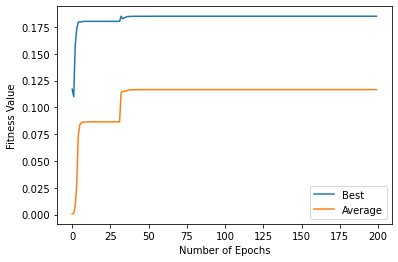

In [3]:


pso_alg = PSO(
    num_epochs=200,
    pop_size=200,
    chrom_length=10,
    n_best=2,
    global_factor = 0.8,
    local_factor = 0.8,
    speed_factor = 0.1,
    v_max=0.2,
    value_ranges=bound_values,
    fitness_func=fitness_func_class,
    neighborhood_mode='self',
    verbose=True,
    eval_every=10,

    )

best_solutions = pso_alg.fit()
pso_alg.plot()

In [4]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = pso_alg.gbest * (max_mat - min_mat) + min_mat
print(best_sol_denorm)

[1.19784834e+07 3.34589503e+00 2.77818126e-01 1.02919203e+02
 1.56539960e+07 4.34524941e+00 2.83012375e-01 8.05557035e+01
 1.98730938e+00 2.97957555e+00]


In [5]:
fitness_func(best_sol_denorm, verbose=True)

***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 40.32814926339068 [kg]
Total Payload Fairing Mass: 1620.453712776459 [kg]
Electronic Mass: 417.0257226718111 [kg]
Power Mass: 96.94596974951592 [kg]
Total Payload Mass: 9634.425405197786 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 381.401199259195
Isp Sea (s): (241.1203751677573, 'Separated (Psep=3.71287e+06, epsSep=113.711)')
Mass flow (kg/s): 420.9103589904743
Thrust Vac (kN): 1923.002183873057
Thrust Sea (kN): 1299.1130086903695
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.8977615848374154 [m]
Fuel Tank Cylyndrical Height: 0.07079147165861677 [m]
Ox Tank Volume: 81.23755402079277 [m3]
Fuel Tank Volume: 33.754798992419154 [m3]
Intertank Structure Mass: 979.2456448206167 [kg]
Separation Explosives Mass: 8.381950102522074 [kg]
Tank Fairing Mass: 643.9939919979181 [kg]
Total Stage Height: 16.078491571266472 [m]
Total Stage Dry Mass: 3334.7096978427844 [

0.18510189080463027